In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ugradio

# 5.2

In [30]:
data1 = 'data.npz'
npz = np.load('data.npz')
npz.files
data1 = npz['arr_0']
print(data1)
signal_A = npz['arr_0'][0,0,:100]
signal_B = npz['arr_0'][1,0,:100]
#plt.plot(data1[0,0,:100])

[[[ -9216  11008 -12544 ...  -6912   4864  -2560]
  [-17152  17408 -17152 ...   7680  -9472  11264]
  [-14848  13824 -12288 ...  15616 -16384  16896]]

 [[ 16640   3584 -10496 ...  -5632   8960  19712]
  [-20480 -15104  -2304 ...  15872   2304 -11520]
  [ 19968   9728  -4864 ... -11264   2816  15872]]]


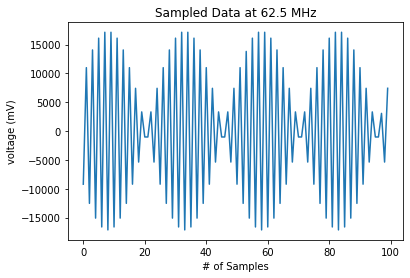

In [33]:
fig = plt.figure()
plt.title('Sampled Data at 62.5 MHz')
#put x axis in time units
plt.xlabel('# of Samples') #62500 data points per second. 100 data points--> 100/(62500 samples/Hz)= .0016 seconds whole sample length
# sample length = # of samples * 62500 Hz
# time interval between samples = 1/62.5 MHz
#what is the units of the voltage? maybe change so units are smaller??/ makes more sense
plt.ylabel('voltage (mV)') #millivolts?
plt.plot(data1[0,0,:100])
fig.savefig('sample_data_plot.pdf')

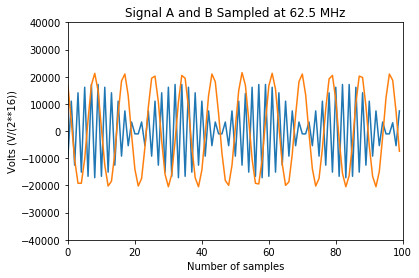

In [32]:
signal_A = npz['arr_0'][0,0,:100]
signal_B = npz['arr_0'][1,0,:100]
plt.xlim(0,100)
plt.ylim(-40000,40000)
plt.xlabel('Number of samples')
plt.ylabel('Volts (V/(2**16))')
plt.title('Signal A and B Sampled at 62.5 MHz')
plt.plot(signal_A)
plt.plot(signal_B)
fig.savefig('signals_A_B_plot.pdf')

In [40]:
'Sampling interval = 1/sampling frequncy'
' # of samples = 100'
' sampling frequency = 62.5 MHz = 62500 Hz = '

time = np.arange(0,0.0016,1/62500)
np.shape(time) #must be the length of the # of samples
data_length = len(signal_A)
n = 1 
sampling_freq_MHz = 62500/n
dt = 1/sampling_freq_MHz
total_sampling_time = dt * data_length
times = np.arange(0,total_sampling_time, dt)

In [42]:
times

array([0.000e+00, 1.600e-05, 3.200e-05, 4.800e-05, 6.400e-05, 8.000e-05,
       9.600e-05, 1.120e-04, 1.280e-04, 1.440e-04, 1.600e-04, 1.760e-04,
       1.920e-04, 2.080e-04, 2.240e-04, 2.400e-04, 2.560e-04, 2.720e-04,
       2.880e-04, 3.040e-04, 3.200e-04, 3.360e-04, 3.520e-04, 3.680e-04,
       3.840e-04, 4.000e-04, 4.160e-04, 4.320e-04, 4.480e-04, 4.640e-04,
       4.800e-04, 4.960e-04, 5.120e-04, 5.280e-04, 5.440e-04, 5.600e-04,
       5.760e-04, 5.920e-04, 6.080e-04, 6.240e-04, 6.400e-04, 6.560e-04,
       6.720e-04, 6.880e-04, 7.040e-04, 7.200e-04, 7.360e-04, 7.520e-04,
       7.680e-04, 7.840e-04, 8.000e-04, 8.160e-04, 8.320e-04, 8.480e-04,
       8.640e-04, 8.800e-04, 8.960e-04, 9.120e-04, 9.280e-04, 9.440e-04,
       9.600e-04, 9.760e-04, 9.920e-04, 1.008e-03, 1.024e-03, 1.040e-03,
       1.056e-03, 1.072e-03, 1.088e-03, 1.104e-03, 1.120e-03, 1.136e-03,
       1.152e-03, 1.168e-03, 1.184e-03, 1.200e-03, 1.216e-03, 1.232e-03,
       1.248e-03, 1.264e-03, 1.280e-03, 1.296e-03, 

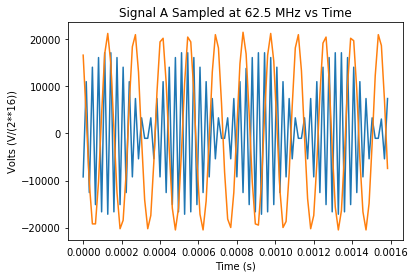

In [49]:
signal_A = npz['arr_0'][0,0,:100]
signal_B = npz['arr_0'][1,0,:100]
#plt.xlim(0,100)
#plt.ylim(-40000,40000)
plt.xlabel('Time (s)')
plt.ylabel('Volts (V/(2**16))')
plt.title('Signal A Sampled at 62.5 MHz vs Time')
plt.plot(times, signal_A)
plt.plot(times, signal_B)
fig.savefig('signal_A_B_time_plot.pdf')

Does the period match like you expected??

Caption for plot: stand-alone description of the plot and what it demonstrates

*What is the minimal sampling rate that accuratley reproduces the spectral frequency nu_knot in the sampled data?? 
-that is Nyquist's Critereon

In [55]:
#ffty = np.fft.fft(data1[0,0,:100])
ffty_A = np.fft.fft(signal_A)
print(ffty_A)

[ 4.60800000e+03+0.00000000e+00j  0.00000000e+00-9.59392331e+01j
 -4.76045561e+02+0.00000000e+00j  0.00000000e+00-2.74343319e+02j
 -6.53720859e+02-5.96069301e+02j  2.84217094e-14-4.14216701e+02j
 -2.17998997e+02+2.84217094e-14j  7.10542736e-15-4.95914578e+02j
 -3.24557494e+02+3.53461458e+02j -1.42108547e-14-5.07962727e+02j
  1.58216701e+02+0.00000000e+00j -1.42108547e-14-4.48669020e+02j
 -4.64344181e+02-2.03018606e+02j  0.00000000e+00-3.26361083e+02j
  4.48669020e+02+1.42108547e-14j  2.84217094e-14-1.58216701e+02j
  4.52523147e+02-2.90624458e+02j  0.00000000e+00+3.21487460e+01j
  4.95914578e+02+1.42108547e-14j  0.00000000e+00+2.17998997e+02j
  4.14216701e+02+0.00000000e+00j  0.00000000e+00+3.73231937e+02j
  2.74343319e+02+0.00000000e+00j  0.00000000e+00+4.76045561e+02j
  5.77578442e+02+2.64783396e+02j -2.29936459e-14+5.12000000e+02j
 -9.59392331e+01-4.80524384e-14j -5.74841148e-15+4.76045561e+02j
 -3.30188266e+02+8.87630018e+02j  1.14968230e-14+3.73231937e+02j
 -4.14216701e+02+1.670586

In [56]:
np.shape(ffty_A)
np.fft.fftfreq(1,ffty_A)

array([ 0.+0.j, -0.+0.j,  0.-0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.-0.j,
        0.+0.j,  0.-0.j, -0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j, -0.+0.j,  0.-0.j,
        0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j, -0.+0.j,  0.+0.j, -0.+0.j,
       -0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j, -0.+0.j,
        0.+0.j, -0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,
       -0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.-0.j,
       -0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.+0.j,  0.-0.j,
        0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.-0.j, -0.+0.j,
        0.-0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j, -0.+0.j,
        0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.+0.j,  0.+0.j,
        0.+0.j, -0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,
       -0.+0.j,  0.-

In [6]:
#plt.plot(ffty)

# 5.3

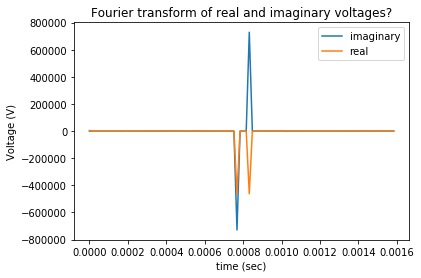

In [60]:
#To plot the imaginary part of the plot and real part of the plot
ffty.imag
plt.plot(times, ffty_A.imag) #blue
plt.plot(times, ffty_A.real) #orange
plt.title('Fourier transform of real and imaginary voltages?')
plt.legend(['imaginary', 'real'])
plt.xlabel('time (sec)')
plt.ylabel('Voltage (V)')
fig.savefig('voltage_A_plot.pdf')
#Caption:

???: Do the plotted points exhibit any symmetry between negative and positive frequencies?
-- Yes the plots of imaginary component and real component both have a trough at time=47, although each has a different amplitude. But where the plot of the imaginary component peaks is where the plot of the real component has a min, at time=53, and still different amplitudes; the real is negative while the imaginary is positive.

Text(0, 0.5, 'Voltage (Hz??)')

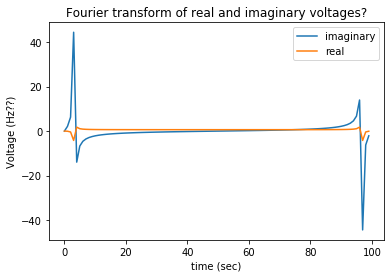

In [8]:
# How to find POWER SPECTRUM?
# use dft to find power spectrum?
#do inverse ft on power spectrum using dft.idft
# ugradio.dft

# Indepdent Data streams
x = np.linspace(-10,10,100)
y = np.sin(x)
#plt.plot(y)
fft_fluke = np.fft.fft(y)
fft_fluke[-1]
plt.plot(fft_fluke.imag) #blue
plt.plot(fft_fluke.real) #orange
plt.title('Fourier transform of real and imaginary voltages?')
plt.legend(['imaginary', 'real'])
plt.xlabel('time (sec)')
plt.ylabel('Voltage (Hz??)')
#fig.savefig('fluke_voltage_plot.pdf')
#Caption:

#compare plots for several independent data captures of the same sine wave:

In [9]:
power = np.abs(ffty)**2
# power = voltage x current --> what are the units??
# power is proportional to the power squared

'what king of symmetry do the two plots have'

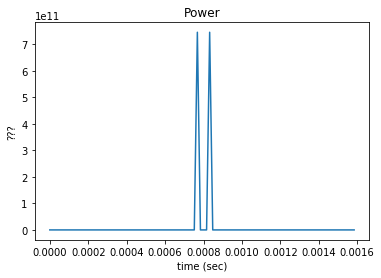

In [61]:
#print(power)
plt.plot(times,power)
plt.title('Power')
plt.xlabel('time (sec)')
plt.ylabel('???')
#fig.savefig('power_plot.pdf')

'The plot for power and voltage peak at the same x-points'
'repeatability?'
'what king of symmetry do the two plots have'

In [20]:
x = ugradio.dft.idft(power) #first array is the input
x[1]
y = ugradio.dft.dft(power)
y[1]

y[1]/x[1]
# np.correlate()
# scipy.signal.correlate()
# Separately calculate the ACF... ~Correlation thm~

array([ 100.-1.04527879e-18j, -100.-1.01265172e-15j,
        100.-2.10169413e-15j, -100.-1.52260838e-18j,
        100.+9.36001284e-15j, -100.+5.05807502e-15j,
        100.-5.57795631e-15j, -100.+1.91461337e-17j,
        100.-1.70928631e-17j, -100.-5.76412587e-14j,
        100.+2.65576193e-14j, -100.-4.36326116e-14j,
        100.+2.41741483e-16j, -100.-6.37389120e-17j,
        100.-4.37423651e-14j, -100.+2.64993296e-14j,
        100.-5.76907894e-14j, -100.-9.13289555e-18j,
        100.-1.22822448e-17j, -100.-5.62853134e-15j,
        100.+5.03482494e-15j, -100.+9.34014684e-15j,
        100.+1.70637146e-18j, -100.-2.11945960e-15j,
        100.-1.02844633e-15j, -100.+9.72877859e-19j,
        100.+1.03272711e-15j, -100.+2.09942620e-15j,
        100.-2.08964874e-17j, -100.-9.33844086e-15j,
        100.-5.05879156e-15j, -100.+5.60532817e-15j,
        100.-3.59947313e-18j, -100.+1.44395406e-17j,
        100.+5.76895282e-14j, -100.-2.65586856e-14j,
        100.+4.36875209e-14j, -100.+7.69530767

# 5.4